<a href="https://colab.research.google.com/github/Atherai448/Atherai448/blob/main/Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bigmarket sales analysis

In [ ]:
import numpy as np
import pandas as pd
#importing therequied libraries for the Analysis of the project.

# Loading of data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Mounting my google drive to the googlecolab notebook where the datasets have been uploaded already.
#so that we need not upload the dataset every timr the runtime is disconnected

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DataSets/Big_Mart Dataset/Train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/DataSets/Big_Mart Dataset/Test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DataSets/Big_Mart Dataset/Train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/DataSets/Big_Mart Dataset/Test.csv')

# Data structure and content

In [ ]:
train.shape
#shape function helps us to indentyhow many rows and coloumns we have according to our data set.

(8523, 12)

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
train.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
test.shape
#shape function helps us to identify how many rows and colums we have according to our data sets

(5681, 11)

In [ ]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [ ]:
test.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
test.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5676,False
5677,False
5678,False
5679,False


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [ ]:
test['Item_Type'].value_counts()

,count
Item_Type,
Snack Foods,789
Fruits and Vegetables,781
Household,638
Frozen Foods,570
Dairy,454
Baking Goods,438
Canned,435
Health and Hygiene,338
Meat,311


In [ ]:
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [ ]:
# create SimpleImputer object for mean imputation in the TRAIN SET
imputer = SimpleImputer(strategy='mean')

# select columns with missing values
cols_with_missing = ["Item_Weight", 'Outlet_Size']

# impute missing values in selected columns
train[cols_with_missing] = imputer.fit_transform(train[cols_with_missing])

NameError: name 'SimpleImputer' is not defined

In [ ]:
import numpy as np
import pandas as pd
#importing therequied libraries for the Analysis of the project.

# DATA STRUCTURE AND CONTENT


## Data preprocessing

In [ ]:
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [ ]:
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [ ]:
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [ ]:
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


**exploratory data analysi**s

uni variant analysis



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

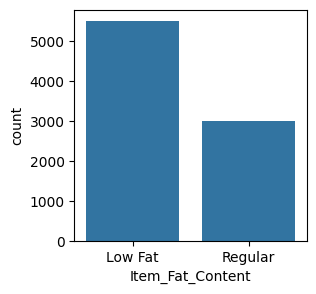

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content' , data=train)
plt.xlabel('Item_Fat_Content')
plt.show()

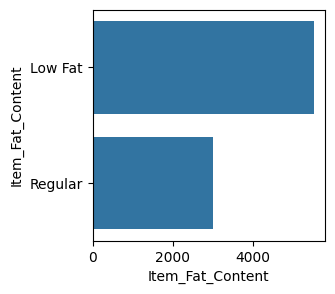

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Item_Fat_Content' , data=train)
plt.xlabel('Item_Fat_Content')
plt.show()

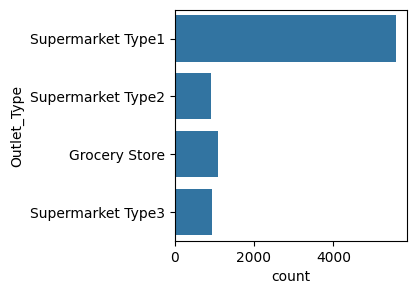

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Type',data=train)
plt.ylabel('Outlet_Type')
plt.show()

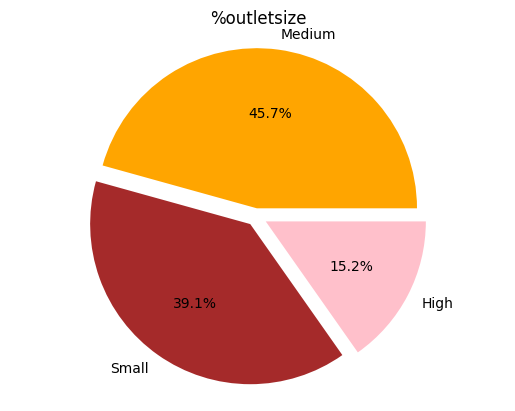

In [ ]:
outletsize=train['Outlet_Size'].value_counts(normalize=True)*100
explode=(0.05,0.06,0.07)
colors=('orange','brown','pink')
plt.pie(outletsize,labels=outletsize.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outletsize')
plt.axis('equal')
plt.show()

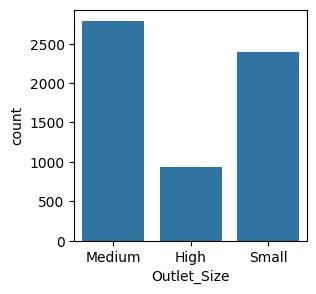

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Size',data=train)
plt.xlabel('Outlet_Size')
plt.show()

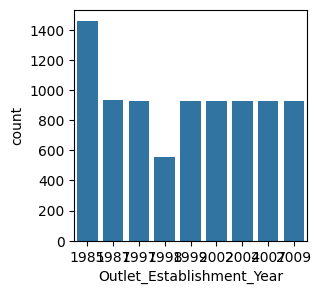

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Establishment_Year',data=train)
plt.xlabel('Outlet_Establishment_Year')
plt.show()

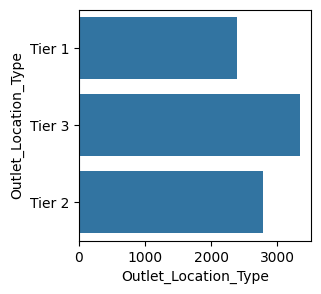

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Location_Type',data=train)
plt.xlabel('Outlet_Location_Type')
plt.show()

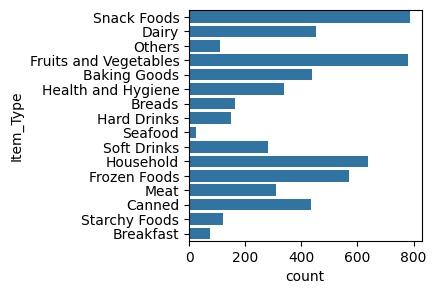

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Item_Type',data=test)
plt.ylabel('Item_Type')
plt.show()

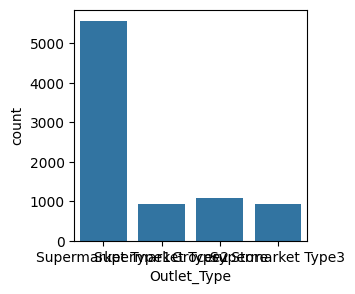

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x='Outlet_Type',data=train)
plt.xlabel('Outlet_Type')
plt.show()

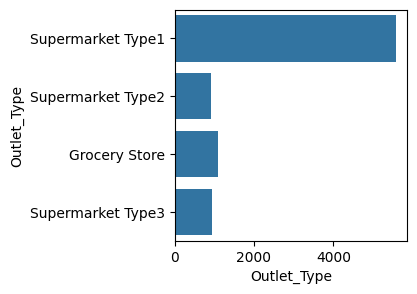

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(y='Outlet_Type',data=train)
plt.xlabel('Outlet_Type')
plt.show()

# TO Handle themissing and categorical values


In [ ]:
#To handle the missing and null values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for col in train.columns:
    if train[col].dtypes=='objects':
      train[col]=le.fit_transform(train[col])

In [ ]:
train['Outlet_Size'].dtypes
#display the data types of 'Outlet_Size' column

dtype('O')

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print(train.columns)  # This will list all the column names in your DataFrame

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [ ]:
# create SimpleImputer object for mean imputation in the TRAIN SET
imputer_numeric = SimpleImputer(strategy='mean')  # Imputer for numeric columns

# select NUMERIC columns with missing values
numeric_cols_with_missing = ["Item_Weight"]

# impute missing values in selected NUMERIC columns
train[numeric_cols_with_missing] = imputer_numeric.fit_transform(train[numeric_cols_with_missing])

# Now handle the 'Outlet_Size' column which is categorical
imputer_categorical = SimpleImputer(strategy='most_frequent') # Use most frequent for categorical
train['Outlet_Size'] = imputer_categorical.fit_transform(train[['Outlet_Size']])[:, 0]

In [ ]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
le=LabelEncoder()
for col in test.columns:
    if test[col].dtypes=='objects':
      test[col]=le.fit_transform(test[col])

In [ ]:
test['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column

dtype('O')

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Apply label encoding to the 'Outlet_Size' column in the training set
le = LabelEncoder()
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

# Now apply

In [ ]:
imputer=SimpleImputer(strategy='mean')
missing_columns=['Item_Weight','Outlet_Size'] # Fix the typo here
train[missing_columns]=imputer.fit_transform(train[missing_columns])

In [ ]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


# HANDLING THE OUTLIERS

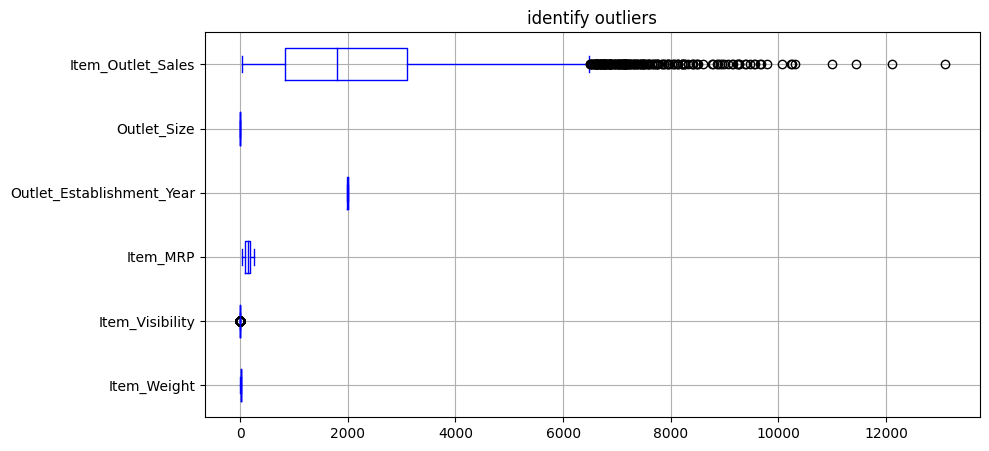

In [ ]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()

In [ ]:
number_columns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()

In [ ]:
q1=np.percentile(train['Item_Outlet_Sales'],25)
q3=np.percentile(train['Item_Outlet_Sales'],75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('IQR',iqr)

q1 834.2474
q3 3101.2964
IQR 2267.049


In [ ]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)

upperlimit 6501.8699
lowerlimit -2566.3261


# cube transformation

In [ ]:
train['Outlet_sales_cube']=np.cbrt(train['Item_Outlet_Sales'])

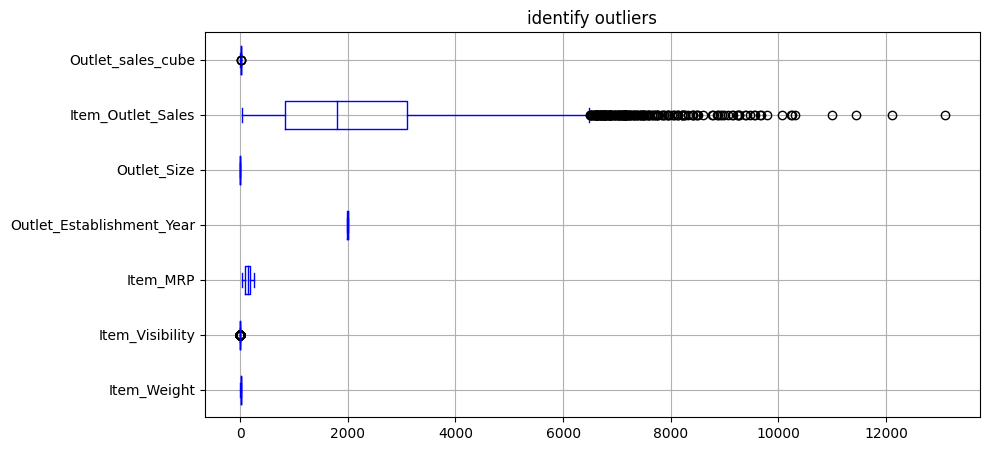

In [ ]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()

# BIVARIENT ANALYSIS


<ipython-input-75-2c7d3778c2e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

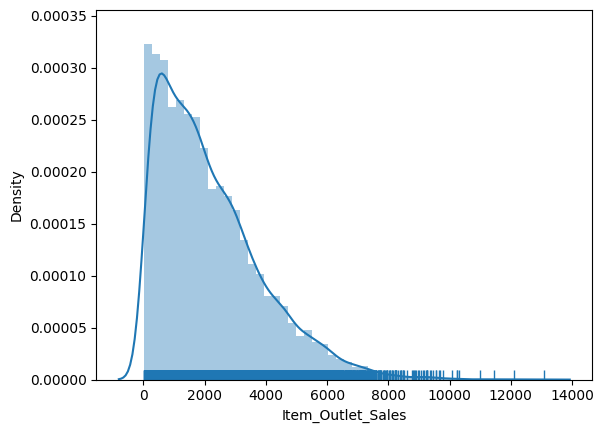

In [ ]:
sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)

<ipython-input-76-95afe8706ee6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_sales_cube'],kde=True ,rug=True)


<Axes: xlabel='Outlet_sales_cube', ylabel='Density'>

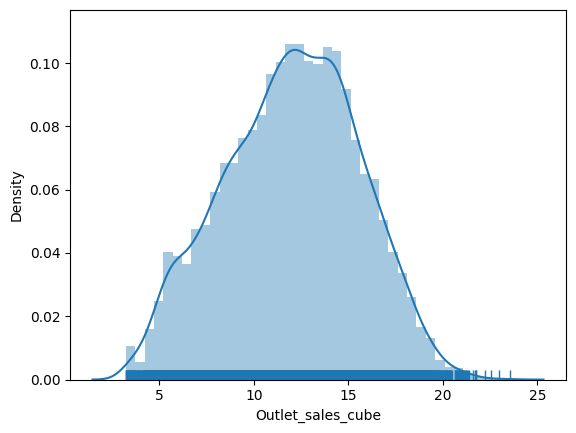

In [ ]:
sns.distplot(a=train['Outlet_sales_cube'],kde=True ,rug=True)

this graph represents

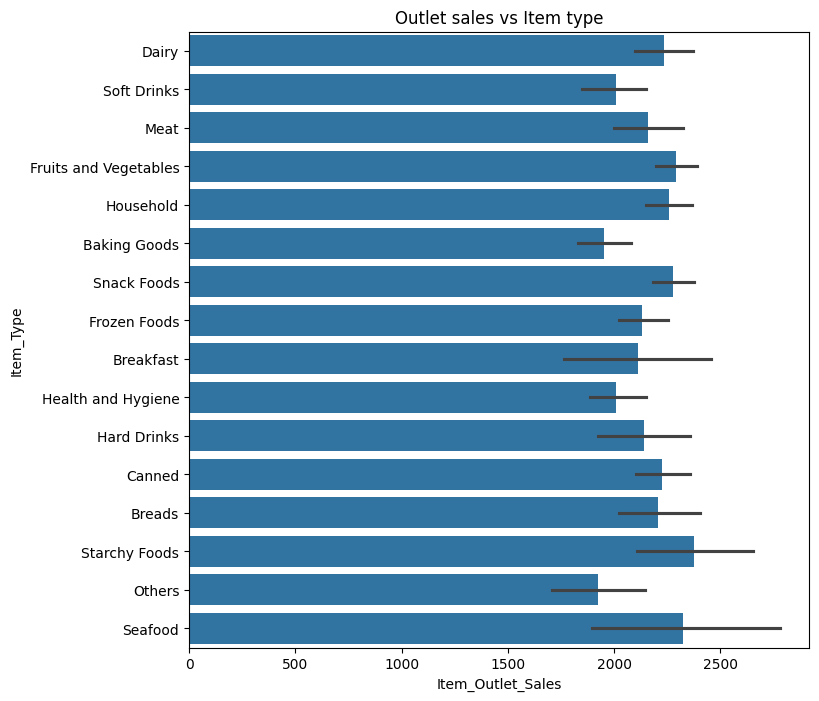

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',data=train).set(title='Outlet sales vs Item type')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_Type')
plt.show()

# mulitvarient analysis

In [ ]:
# Subset the dataset to include only the relevant columns
# Verify the correct column name exists in the DataFrame
print(train.columns)  # Print available columns to check for 'Outlet_Sales_Cube'

# Proceed with subsetting if the column exists, otherwise, investigate why it's missing
if 'Outlet_Sales_Cube' in train.columns:
    subset = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
                 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
                 'Item_Outlet_Sales','Outlet_Sales_Cube']]

    # Calculate the correlation matrix
    corr = subset.corr()

    # ... rest of your code ...
else:
    print("Column 'Outlet_Sales_Cube' not found in the DataFrame. Please check its creation.")

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Column 'Outlet_Sales_Cube' not found in the DataFrame. Please check its creation.


# feature engineering

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_sales_cube,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380,15.515611,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228,7.625576,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700,12.800240,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.0,Tier 3,Grocery Store,732.3800,9.013888,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,0.0,Tier 3,Supermarket Type1,994.7052,9.982319,37


In [ ]:
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year: 2024- year)
 #lambda fun will be executed each and every record
#lambda data type in outlet establishment year

In [ ]:
train.head()# to get a outlet age coloumn

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_sales_cube,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380,15.515611,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228,7.625576,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700,12.800240,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1.0,Tier 3,Grocery Store,732.3800,9.013888,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,0.0,Tier 3,Supermarket Type1,994.7052,9.982319,37


In [ ]:
train=train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight'],axis=1)
# to remove a column we use drop
# item and outlet identifier have an unique and unwanted list so we remove that
# we also drop establishment year because we get an outlet age by the establishment year so drop year column


In [ ]:
train=train.drop(['Item_Visibility','Outlet_sales_sqrt'],axis=1) #normalistion feature scaling for the decision tree
 #standard scaling is normal all the vlues by 1 like 0.003

KeyError: "['Outlet_sales_sqrt'] not found in axis"

In [ ]:
train.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_sales_cube,Outlet_Age
0,Low Fat,0.016047,Dairy,249.8092,Tier 1,Supermarket Type1,3735.1380,15.515611,25
1,Regular,0.019278,Soft Drinks,48.2692,Tier 3,Supermarket Type2,443.4228,7.625576,15
2,Low Fat,0.016760,Meat,141.6180,Tier 1,Supermarket Type1,2097.2700,12.800240,25
3,Regular,0.000000,Fruits and Vegetables,182.0950,Tier 3,Grocery Store,732.3800,9.013888,26
4,Low Fat,0.000000,Household,53.8614,Tier 3,Supermarket Type1,994.7052,9.982319,37


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test['Outlet_Age']=test['Outlet_Establishment_Year'].apply(lambda year: 2024- year)
 #lambda fun will be executed each and every record
#lambda data type in outlet establishment year

In [ ]:
test.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,25
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,17
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,26
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,17
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,39


In [ ]:
test=test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Item_Weight'],axis=1)
# to remove a column we use drop
# item and outlet identifier have an unique and unwanted list so we remove that
# we also drop establishment year because we get an outlet age by the establishment year so drop year column


STANDARD NORMAL DISTRIBUTION changing the normal distrution into SND snd is mean (u)=0 standard deviation is (beta)=1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
y=train['Outlet_sales_cube']


In [ ]:
scalar=StandardScaler() # to scaling the data properly

In [ ]:
x=pd.DataFrame(x) # by using pandas library

In [ ]:
x.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,Low Fat,Dairy,249.8092,Tier 1,Supermarket Type1,25
1,Regular,Soft Drinks,48.2692,Tier 3,Supermarket Type2,15
2,Low Fat,Meat,141.6180,Tier 1,Supermarket Type1,25
3,Regular,Fruits and Vegetables,182.0950,Tier 3,Grocery Store,26
4,Low Fat,Household,53.8614,Tier 3,Supermarket Type1,37


In [ ]:
print(x)

     Item_Fat_Content              Item_Type  Item_MRP Outlet_Location_Type  \
0             Low Fat                  Dairy  249.8092               Tier 1   
1             Regular            Soft Drinks   48.2692               Tier 3   
2             Low Fat                   Meat  141.6180               Tier 1   
3             Regular  Fruits and Vegetables  182.0950               Tier 3   
4             Low Fat              Household   53.8614               Tier 3   
...               ...                    ...       ...                  ...   
8518          Low Fat            Snack Foods  214.5218               Tier 3   
8519          Regular           Baking Goods  108.1570               Tier 2   
8520          Low Fat     Health and Hygiene   85.1224               Tier 2   
8521          Regular            Snack Foods  103.1332               Tier 3   
8522          Low Fat            Soft Drinks   75.4670               Tier 1   

            Outlet_Type  Outlet_Age  
0     Superma

In [ ]:
X=test[['Item_Fat_Content', 'Item_Visibility','Item_Type','Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Age',]]


In [ ]:
X=pd.DataFrame(X)


In [ ]:
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Age
0,Low Fat,0.007565,Snack Foods,107.8622,Supermarket Type1,Tier 1,25
1,Regular,0.038428,Dairy,87.3198,Supermarket Type1,Tier 2,17
2,Low Fat,0.099575,Others,241.7538,Grocery Store,Tier 3,26
3,Low Fat,0.015388,Snack Foods,155.0340,Supermarket Type1,Tier 2,17
4,Regular,0.118599,Dairy,234.2300,Supermarket Type3,Tier 3,39


In [ ]:
print(X)

     Item_Fat_Content  Item_Visibility           Item_Type  Item_MRP  \
0             Low Fat         0.007565         Snack Foods  107.8622   
1             Regular         0.038428               Dairy   87.3198   
2             Low Fat         0.099575              Others  241.7538   
3             Low Fat         0.015388         Snack Foods  155.0340   
4             Regular         0.118599               Dairy  234.2300   
...               ...              ...                 ...       ...   
5676          Regular         0.013496         Snack Foods  141.3154   
5677          Regular         0.142991       Starchy Foods  169.1448   
5678          Low Fat         0.073529  Health and Hygiene  118.7440   
5679          Regular         0.000000              Canned  214.6218   
5680          Regular         0.104720              Canned   79.7960   

            Outlet_Type Outlet_Location_Type  Outlet_Age  
0     Supermarket Type1               Tier 1          25  
1     Supermarket

LINEAR REGRESSION #it a supervised learning #target variable #dependent variable

two types:
   simple linear regression
   multiple linear regression
SIMPLE LINEAR REGRESSION # 1 dependent variable # represented by simple equation y=mx+c but in ml #y=(beta)x+beta1 concept resemble to(support vector classifier)

Cost function: # it is used to predict and minimize the error # 1%2m (y^-yi)2 when i=1

** REGRESSOR MATRIX**:
1.*Mean Square Error*(MSE):
            # slope lines on the points are called acutal points
            # nearby slope points are called predicted points
        #calculates the average sqaure difference betweeen the actual and predictable point
        #1%n(Yi-y^)in i=1
            where n=no.of data point
            y^-predicted data pt

        2.*Mean Absolute Error*(MAE):
            #The accuracy of the regression model
            # it calculate average absolute difference
            # 1%n(Yi-y^) on i=1
            # MAE(low) increses so the model performance(high) decreases

        3.*R square2 valve*:
            # Proportion of Variance in a Dependent Feature
             # TSS = Total sum of squsre
             # RSS = Residual sum of Square
             # R2=1-(RSS%TSS)
             # r2 value ranges between 0-1

          

# Model building

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS


In [ ]:
# Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(x,y)

# Precting the model using the test set
X_predict = lr.predict(x)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, x, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")


ValueError: could not convert string to float: 'Low Fat'

R-Square value on the training set: =  0.547877710398841
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.55711185 0.56288004 0.52733977 0.53787348 0.5479435 ]

Average CV R-squared score: 0.5466297272305614

In [ ]:

import pickle # to saving all project


In [ ]:

Bigmart="Bigmart_Analysis.sav"
pickle.dump(lr,open(Bigmart,'wb'))